## PCA Basics

*Presented at [TogaData - Mar 26, 2017](https://www.meetup.com/Saratoga-Machine-Learning-and-Big-Data-Analytics/events/238640065/)*  
*by Chris Farr, PhD*

### Purpose
To review basic principles and applications of Prinicipal Components Analysis (PCA)

### Agenda
1. Motivation
1. Data
1. Covariance
1. Eigen-decomposition of $\Sigma$
1. Dimensionality Reduction: 2D to 1D
1. Variance Retained
1. Summary of Eigen-decomposition Approach
1. sklearn.decomposition.PCA
1. Three Examples

### 1. Motivation

**What is it?**  
A non-parametric, unsupervised learning teachnique

**How does it work?**
* *Reveals the internal structure of the data in a way that best explains the variance in the data.* [Wikipedia article on PCA](https://en.m.wikipedia.org/wiki/Principal_component_analysis)
* *Reveals simple underlying structures in complex data sets using analytical solutions from linear algebra.* [Google research paper](https://arxiv.org/pdf/1404.1100.pdf)
* *Quantifies the importance of each dimension by describing the variability of a data set.* [Google research paper](https://arxiv.org/pdf/1404.1100.pdf)
* *Emphasizes variation and brings out strong patterns in a dataset.* [Eating in the UK (a 17D example)](http://setosa.io/ev/principal-component-analysis/)

**What is it used for?**
* Exploratory Data Analysis
* Visualization
* Dimensionality Reduction
* Feature Selection

### 2. Data

In [1]:
import numpy as np

In [2]:
# Create (6x2) array
A = np.array([
        [ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]
    ])

m,n = A.shape # m-observations, n-features

print("Array:")
print(A) # our array

print("---")
print("Dimensions:")
print(A.shape) # shape

print("---")
print("Mean across Rows:")
print(np.mean(A,axis=0))

Array:
[[ 3  7]
 [-4 -6]
 [ 7  8]
 [ 1 -1]
 [-4 -1]
 [-3 -7]]
---
Dimensions:
(6, 2)
---
Mean across Rows:
[ 0.  0.]


In [3]:
# Note: you can convert this easily into a DataFrame ...
import pandas as pd
df = pd.DataFrame(A, columns = ['a0', 'a1'])
print(df)

   a0  a1
0   3   7
1  -4  -6
2   7   8
3   1  -1
4  -4  -1
5  -3  -7


In [4]:
# ... and can go from df back to np.array
df.values

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

### 3. Covariance

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# makes charts pretty
import seaborn as sns
sns.set(color_codes=True)

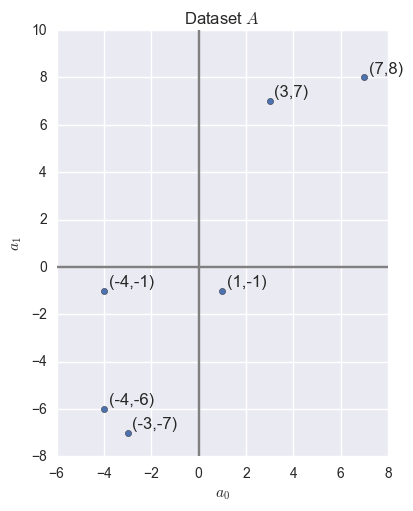

In [6]:
# plots
plt.scatter(A[:,0],A[:,1])

# annotations
for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Dataset $A$")

Sample covariance between $a_0$ and $a_1$:

$$
cov_{a_0,a_1} =\frac{\sum_{i=0}^{m-1}(a_0^i - \bar{a_0})(a_1^i - \bar{a_1})}{m-1}
$$

In [7]:
# Calculate covariance between a0 and a1
a0 = A[:,0]
a1 = A[:,1]
prod = a0*a1 # element-wise product, ignore means as zero already
print("Length of prod equals " + str(len(prod)))
print("---")
print("Covariance:")
print(np.sum(prod)/(m-1))

Length of prod equals 6
---
Covariance:
25.0


In [8]:
# Get more stuff using NumPy's covariance method
np.cov(a0,a1)

array([[ 20.,  25.],
       [ 25.,  40.]])

Linear Algebra way:
$$
\Sigma = \frac{A^TA}{(m-1)}
$$

In [9]:
# Aside: What does A.T do?
A.T # or np.transpose(A)

array([[ 3, -4,  7,  1, -4, -3],
       [ 7, -6,  8, -1, -1, -7]])

In [10]:
# Matrix Multiplication, note @ operator
A.T @ A # or np.dot(A.T,A)

array([[100, 125],
       [125, 200]])

In [11]:
# Need to divide by (m-1) to yield true Sample Covariance Matrix
# Let's call this Sigma
Sigma = (A.T @ A)/(m-1) # or np.cov(A.T)
Sigma

array([[ 20.,  25.],
       [ 25.,  40.]])

### 4. Eigen-decomposition of $\Sigma$

According to [Wikipedia article on PCA](https://en.m.wikipedia.org/wiki/Principal_component_analysis), *"PCA can be done by eigenvalue decomposition of a data covariance (or correlation) matrix or singular value decomposition of a data matrix."* I choose the first approach.

*$\Sigma$ is a real, symmetric matrix; thus, it has 1) real eigenvalues and 2) orthogonal eigenvectors.* See Prof. Strang's Course [Lecture 25](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/lecture-25-symmetric-matrices-and-positive-definiteness/) about symmetric matrices.

In [12]:
l, X = np.linalg.eig(Sigma)
print("Eigenvalues:")
print(l)
print("---")
print("Eigenvectors:")
print(X)

Eigenvalues:
[  3.07417596  56.92582404]
---
Eigenvectors:
[[-0.82806723 -0.56062881]
 [ 0.56062881 -0.82806723]]


Recall from your Linear Algebra class that the following should hold:

\begin{eqnarray}
\Sigma x_0 &=& \lambda_0 x_0 \nonumber \\
\Sigma x_1 &=& \lambda_1 x_1 \nonumber \\
\end{eqnarray}

In [13]:
# let's check the first Eigenvalue, Eigenvector combination
print("Sigma times eigenvector:")
print(Sigma @ X[:,0]) # 2x2 times 2x1
print("Eigenvalue times eigenvector:")
print(l[0] * X[:,0]) # scalar times 2x1, ANNOYING - MUST USE * vs. @

Sigma times eigenvector:
[-2.54562438  1.72347161]
Eigenvalue times eigenvector:
[-2.54562438  1.72347161]


In [14]:
# ... and the second
print("Sigma times eigenvector:")
print(Sigma @ X[:,1]) # 2x2 times 2x1
print("Eigenvalue times eigenvector:")
print(l[1] * X[:,1]) # scalar times 2x1, ANNOYING - MUST USE * vs. @

Sigma times eigenvector:
[-31.91425695 -47.13840945]
Eigenvalue times eigenvector:
[-31.91425695 -47.13840945]


In [15]:
print("The first principal component is evector with largest evalue:")
print(X[:,1])
print("---")
print("Second principal component:")
print(X[:,0])

The first principal component is evector with largest evalue:
[-0.56062881 -0.82806723]
---
Second principal component:
[-0.82806723  0.56062881]


In [16]:
# Orthogonal? A: Yes
X[:,1].T @ X[:,0]

0.0

In [17]:
# Length 1? A: Yes
print(np.sqrt(X[:,1].T @ X[:,1]))
print(np.sqrt(X[:,0].T @ X[:,0]))

1.0
1.0


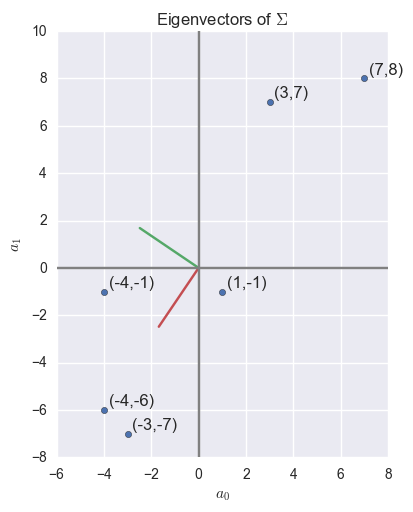

In [18]:
# plots
plt.scatter(A[:,0],A[:,1])
scale = 3 # increase this scaling factor to highlight these vectors
plt.plot([0,X[0,1]*scale],[0,X[1,1]*scale],'r') # First principal component
plt.plot([0,X[0,0]*scale],[0,X[1,0]*scale],'g') # Second principal component

# annotations
for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Eigenvectors of $\Sigma$")

### 5. Dimensionality Reduction: 2D to 1D

I discovered why Prof. Ng recommended **Octave/Matlab** versus **Python**. Linear algebra expressions are not clean in **Python**. Had to convert `np.array` to `matrix` object. See below.

In [19]:
# change to matrix
Amat = np.asmatrix(A)
Xmat = np.asmatrix(X)

In [20]:
# Choose eigenvector with highest eigenvalue as first principal component
pc1 = Xmat[:,1]

In [21]:
Acomp = Amat @ pc1 # 6x2 @ 2x1 yields 6x1
print("Compressed version of A:")
print(Acomp)

Compressed version of A:
[[ -7.47835704]
 [  7.21091862]
 [-10.54893951]
 [  0.26743842]
 [  3.07058247]
 [  7.47835704]]


In [22]:
Arec = Acomp @ pc1.T # 6x1 @ 1x2, this breaks with np.array
print("Reconstruction from 1D compression of A:")
print(Arec)

Reconstruction from 1D compression of A:
[[ 4.1925824   6.1925824 ]
 [-4.04264872 -5.97112541]
 [ 5.9140394   8.73523112]
 [-0.14993368 -0.22145699]
 [-1.72145699 -2.54264872]
 [-4.1925824  -6.1925824 ]]


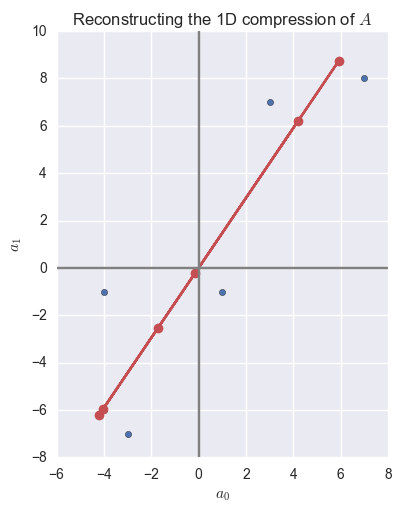

In [23]:
# plots
plt.scatter(Amat[:,0], Amat[:,1]) # A in blue
plt.plot(Arec[:,0],Arec[:,1],'r', marker='o') # Arec in RED

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Reconstructing the 1D compression of $A$")

In [24]:
print(np.linalg.matrix_rank(Amat)) # originally a Rank 2 matrix
print(np.linalg.matrix_rank(Arec)) # reconstructed matrix is Rank 1

2
1


By tacking on the Rank-1 matrix related to the 2nd eigenvector you get back to the original data:

In [25]:
# Add the Rank 1 matrix for the other vector to recover A completely
Amat @ Xmat[:,1] @ Xmat[:,1].T + Amat @ Xmat[:,0] @ Xmat[:,0].T

matrix([[ 3.,  7.],
        [-4., -6.],
        [ 7.,  8.],
        [ 1., -1.],
        [-4., -1.],
        [-3., -7.]])

In [26]:
# Why does this work? Well, recall 
# X @ X.T is identity matrix as X is orthonormal
A @ Xmat @ Xmat.T

matrix([[ 3.,  7.],
        [-4., -6.],
        [ 7.,  8.],
        [ 1., -1.],
        [-4., -1.],
        [-3., -7.]])

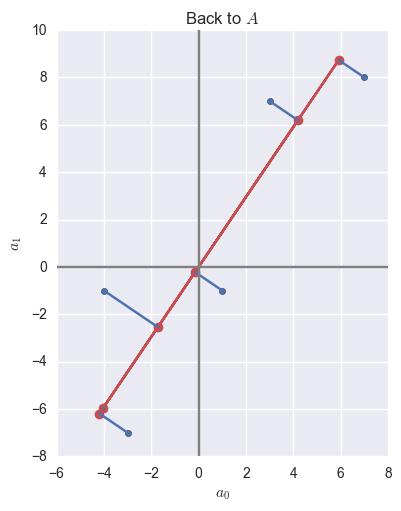

In [27]:
# plots
plt.scatter(A[:,0], A[:,1]) # A in blue
plt.plot(Arec[:,0],Arec[:,1],'r', marker='o') # Arec in RED

# across observations
for i in range(m):
    e = np.vstack((A[i],Arec[i]))
    plt.plot(e[:,0],e[:,1],'b') # BLUE

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Back to $A$")

[Wicked animated GIF which illustrates PCA](http://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

Magically, eigen-decomposition (or PCA) finds the line where
1. the spread of values along the black line is **maximal**
2. the projection error (sum of red lines) is **minimal**

<img src="https://i.stack.imgur.com/Q7HIP.gif">

### 6. Variance Retained

In [28]:
# Average squared projection error using PC1
unexp_err = np.mean(np.sum(np.square(Amat - Arec),axis=1))
total_err = np.mean(np.sum(np.square(Amat),axis=1))
ret_err = 1 - (unexp_err / total_err) # percent of variance retained
print(ret_err)

0.948763733928


In [29]:
# Using eigenvalues
l[1]/np.sum(l) # recall, use the 2nd eigenvalue

0.94876373392787527

### 7. Summary of Eigen-decomposition Approach

1. Normalize columns of $A$ so that each feature has zero mean
1. Compute sample covariance matrix $\Sigma = {A^TA}/{(m-1)}$
1. Perform eigen-decomposition of $\Sigma$ using `np.linalg.eig(Sigma)`
1. Compress by ordering $k$ evectors according to largest evalues and compute $AX_k$
1. Reconstruct from compressed version by computing $A X_k X_k^T$

### 8. sklearn.decomposition.PCA

The scikit-learn library has a PCA module which performs this work, abstracting from the details went through above. (I believe it uses SVD versus computing $A^T A$ directly.) Let's try it out and compare results.

In [30]:
from sklearn.decomposition import PCA

In [31]:
# perform PCA
pca = PCA(n_components=1)
pca.fit(A) # run PCA

PCA(copy=True, n_components=1, whiten=False)

In [32]:
# Compressed version of A, 1D
print("sklearn.decomposition.PCA:")
print(pca.transform(A))
print("---")
print("Eigen-decomposition:")
print(Acomp)

sklearn.decomposition.PCA:
[[ -7.47835704]
 [  7.21091862]
 [-10.54893951]
 [  0.26743842]
 [  3.07058247]
 [  7.47835704]]
---
Eigen-decomposition:
[[ -7.47835704]
 [  7.21091862]
 [-10.54893951]
 [  0.26743842]
 [  3.07058247]
 [  7.47835704]]


In [33]:
# Principal Components
print("sklearn.decomposition.PCA:")
print(pca.components_)
print("---")
print("Eigen-decomposition:")
print(pc1)

sklearn.decomposition.PCA:
[[-0.56062881 -0.82806723]]
---
Eigen-decomposition:
[[-0.56062881]
 [-0.82806723]]


In [34]:
# Explained Variance
print("sklearn.decomposition.PCA:")
print(pca.explained_variance_ratio_)
print("---")
print("Eigen-decomposition:")
print(ret_err)

sklearn.decomposition.PCA:
[ 0.94876373]
---
Eigen-decomposition:
0.948763733928


In [35]:
# Reconstruction from compressed version of A
print("sklearn.decomposition.PCA:")
print(pca.inverse_transform(pca.transform(A)))
print("---")
print("Eigen-decomposition:")
print(Arec)

sklearn.decomposition.PCA:
[[ 4.1925824   6.1925824 ]
 [-4.04264872 -5.97112541]
 [ 5.9140394   8.73523112]
 [-0.14993368 -0.22145699]
 [-1.72145699 -2.54264872]
 [-4.1925824  -6.1925824 ]]
---
Eigen-decomposition:
[[ 4.1925824   6.1925824 ]
 [-4.04264872 -5.97112541]
 [ 5.9140394   8.73523112]
 [-0.14993368 -0.22145699]
 [-1.72145699 -2.54264872]
 [-4.1925824  -6.1925824 ]]


### 9. Three Examples

In [36]:
from sklearn import datasets

#### [Iris Dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

Let's try going from 4D to 2D using the classical iris dataset.

In [37]:
iris = datasets.load_iris() # Bunch object
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [38]:
A0 = iris.data # np.array

print("Dimensions:")
print(A0.shape)

print("---")
print("First 5 samples:")
print(A0[:5,:])

print("---")
print("Feature names:")
print(iris.feature_names)

Dimensions:
(150, 4)
---
First 5 samples:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
---
Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [39]:
# Eigen-decomposition: 5-step process

# 1. Normalize columns of $A$ so that each feature has zero mean
mu = np.mean(A0,axis=0)
A = A0 - mu
print("Does A have zero mean across rows?")
print(np.mean(A,axis=0))

# 2. Compute sample covariance matrix $\Sigma = {A^TA}/{(m-1)}$
m,n = A.shape
Sigma = (A.T @ A)/(m-1)
print("---")
print("Sigma:")
print(Sigma)

# 3. Perform eigen-decomposition of $\Sigma$ using `np.linalg.eig(Sigma)`
l,X = np.linalg.eig(Sigma)
print("---")
print("Evalues:")
print(l)
print("---")
print("Evectors:")
print(X)

# 4. Compress by ordering $k$ evectors according to largest evalues and compute $AX_k$
print("---")
print("Compressed - 4D to 2D:")
Acomp = A @ X[:,:2] # first 2 evectors
print(Acomp[:5,:]) # first 5 observations

# 5. Reconstruct from compressed version by computing $A X_k X_k^T$
print("---")
print("Reconstructed version - 2D to 4D:")
Arec = A @ X[:,:2] @ X[:,:2].T # first 2 evectors
print(Arec[:5,:]+mu) # first 5 obs, adding mu to compare to original

Does A have zero mean across rows?
[ -1.12502600e-15  -6.75015599e-16  -3.23889064e-15  -6.06921920e-16]
---
Sigma:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
---
Evalues:
[ 4.22484077  0.24224357  0.07852391  0.02368303]
---
Evectors:
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]
---
Compressed - 4D to 2D:
[[-2.68420713 -0.32660731]
 [-2.71539062  0.16955685]
 [-2.88981954  0.13734561]
 [-2.7464372   0.31112432]
 [-2.72859298 -0.33392456]]
---
Reconstructed version - 2D to 4D:
[[ 5.08718247  3.51315614  1.4020428   0.21105556]
 [ 4.75015528  3.15366444  1.46254138  0.23693223]
 [ 4.70823155  3.19151946  1.30746874  0.17193308]
 [ 4.64598447  3.05291508  1.46083069  0.23

In [40]:
# Using sklearn.decomposition.PCA

pca = PCA(n_components=2) # two components
pca.fit(A0) # run PCA, putting in raw version for fun

print("Principal components:")
print(pca.components_)

print("---")
print("Compressed - 4D to 2D:")
print(pca.transform(A0)[:5,:]) # first 5 obs

print("---")
print("Reconstructed - 2D to 4D:")
print(pca.inverse_transform(pca.transform(A0))[:5,:]) # first 5 obs

Principal components:
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]
---
Compressed - 4D to 2D:
[[-2.68420713 -0.32660731]
 [-2.71539062  0.16955685]
 [-2.88981954  0.13734561]
 [-2.7464372   0.31112432]
 [-2.72859298 -0.33392456]]
---
Reconstructed - 2D to 4D:
[[ 5.08718247  3.51315614  1.4020428   0.21105556]
 [ 4.75015528  3.15366444  1.46254138  0.23693223]
 [ 4.70823155  3.19151946  1.30746874  0.17193308]
 [ 4.64598447  3.05291508  1.46083069  0.23636736]
 [ 5.07593707  3.5221472   1.36273698  0.19458132]]


#### [Eating in the UK (a 17D example)](http://setosa.io/ev/principal-component-analysis/)

Visualization is another application of PCA. Let's look at 17D data!

In [41]:
d = np.array([
        [375, 135, 458, 475],
        [57, 47, 53, 73],
        [245, 267, 242, 227],
        [1472, 1494, 1462, 1582],
        [105, 66, 103, 103],
        [54, 41, 62, 64],
        [193, 209, 184, 235],
        [147, 93, 122, 160],
        [1102, 674, 957, 1137],
        [720, 1033, 566, 874],
        [253, 143, 171, 265],
        [685, 586, 750, 803],
        [488, 355, 418, 570],
        [198, 187, 220, 203],
        [360, 334, 337, 365],
        [1374, 1506, 1572, 1256],
        [156, 139, 147, 175]
    ])

In [42]:
countries = ['England', 'N Ireland', 'Scotland', 'Wales']
food = ['Alcoholic drinks', 'Beverages', 'Carcase meat', 'Cereals',
       'Cheese', 'Confectionery', 'Fats and oils', 'Fish', 'Fresh fruit',
       'Fresh potatoes', 'Fresh Veg', 'Other meat', 'Other Veg',
        'Processed potatoes', 'Processed Veg', 'Soft drinks', 'Sugars']

In [43]:
# Use pandas DataFrame
df = pd.DataFrame(d.T, index=countries, columns=food)
df

,Alcoholic drinks,Beverages,Carcase meat,Cereals,Cheese,Confectionery,Fats and oils,Fish,Fresh fruit,Fresh potatoes,Fresh Veg,Other meat,Other Veg,Processed potatoes,Processed Veg,Soft drinks,Sugars
England,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
N Ireland,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
Scotland,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
Wales,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175


In [44]:
# perform PCA, 17D to 2D
pca = PCA(n_components=2)
Acomp = pca.fit_transform(df) # just put DataFrame in!

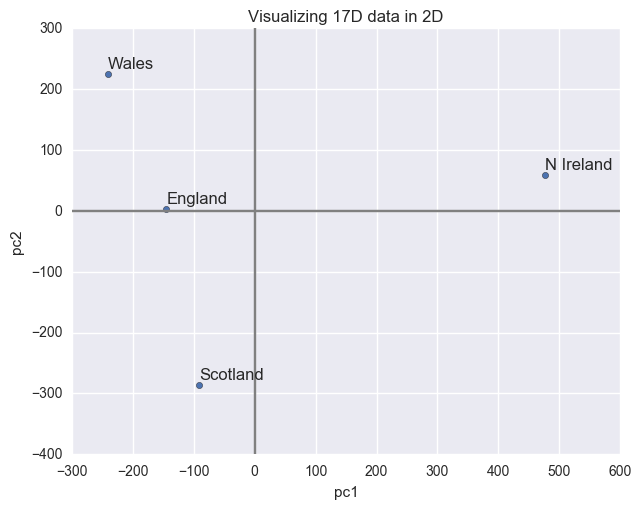

In [45]:
# plots
plt.scatter(Acomp[:,0], Acomp[:,1]) # A in blue

# annotations
for i in range(len(countries)):
    plt.annotate(countries[i],(Acomp[i,0],Acomp[i,1]+10))
    
# axes
plt.plot([-300,600],[0,0],'grey') # x-axis
plt.plot([0,0],[-400,300],'grey') # y-axis
plt.axis([-300, 600, -400, 300])
plt.axes().set_aspect('equal')

# labels
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("Visualizing 17D data in 2D")

#### [Olivetti Faces Dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces)

Let's **face** it, Data Science is fun! Now put your **Eigen-face** on and review the below. *Some code modified from [a blog post on unsupervised learning](https://bugra.github.io/work/notes/2014-11-16/an-introduction-to-unsupervised-learning-scikit-learn/).*

In [46]:
# Describe data
faces = datasets.olivetti_faces.fetch_olivetti_faces()
print(faces.DESCR)

Modified Olivetti faces dataset.

The original database was available from (now defunct)

    http://www.uk.research.att.com/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [47]:
A0 = faces.data # np.array

print("Dimensions:")
print(A0.shape)

print("---")
print("First 5 samples:")
print(A0[:5,:])

Dimensions:
(400, 4096)
---
First 5 samples:
[[ 0.30991736  0.36776859  0.41735536 ...,  0.15289256  0.16115703
   0.1570248 ]
 [ 0.45454547  0.47107437  0.51239669 ...,  0.15289256  0.15289256
   0.15289256]
 [ 0.31818181  0.40082645  0.49173555 ...,  0.14049587  0.14876033
   0.15289256]
 [ 0.19834711  0.19421488  0.19421488 ...,  0.75206614  0.75206614
   0.73966944]
 [ 0.5         0.54545456  0.58264464 ...,  0.17768595  0.17355372
   0.17355372]]


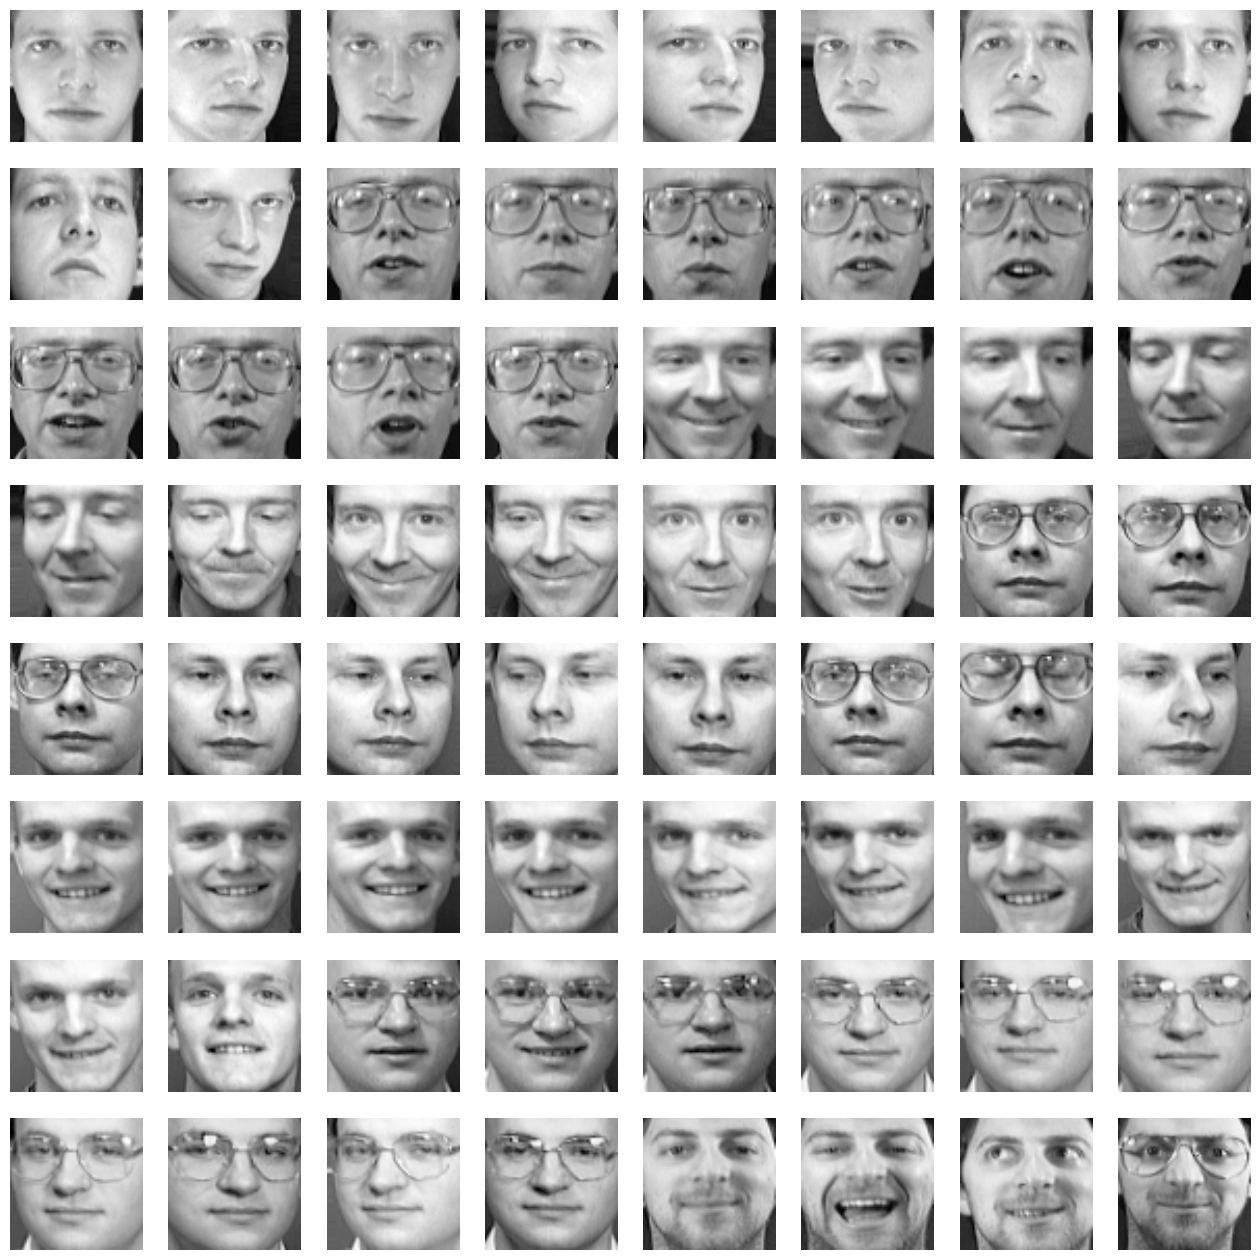

In [48]:
# Sample of original faces
fig = plt.figure(figsize=(16, 16))
for i in range(64):
    plt.subplot(8, 8, i + 1) # It starts with one
    plt.imshow(A0[i].reshape(64,64), cmap=plt.cm.gray)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

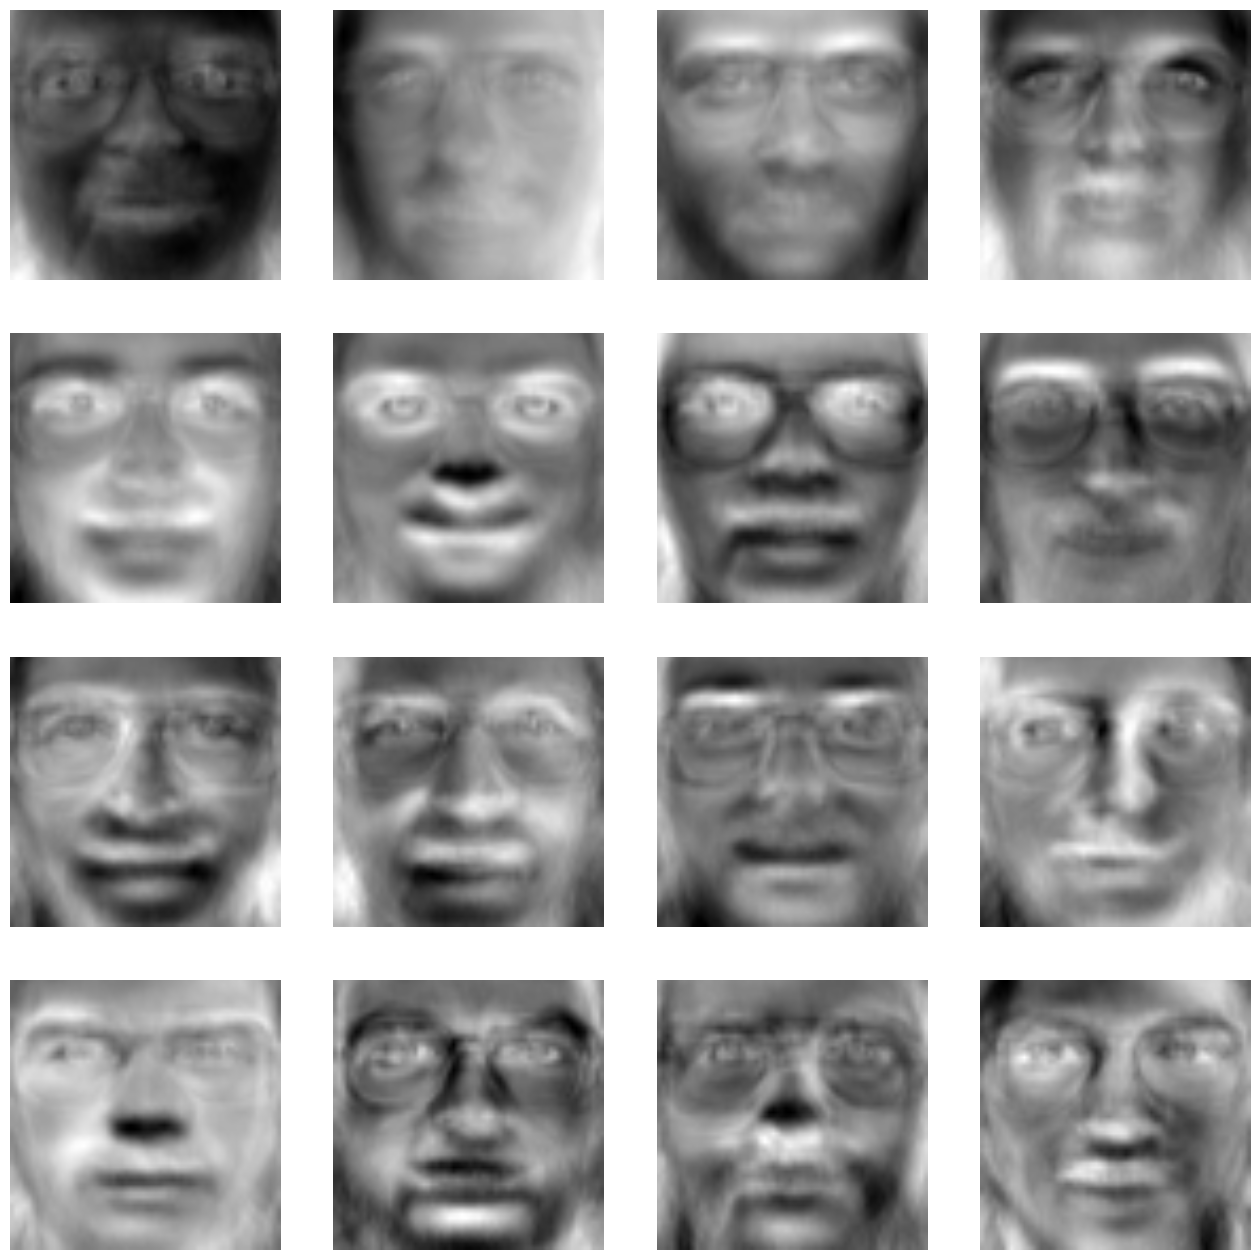

In [49]:
# Eigen-faces!
pca = PCA(n_components=16) # 16 eigenfaces
pca.fit(A0)
plt.figure(figsize=(16, 16));
for i in range(pca.components_.shape[0]):
    plt.subplot(4, 4, i + 1) # It starts with one
    plt.imshow(pca.components_[i].reshape(64, 64), cmap=plt.cm.gray)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

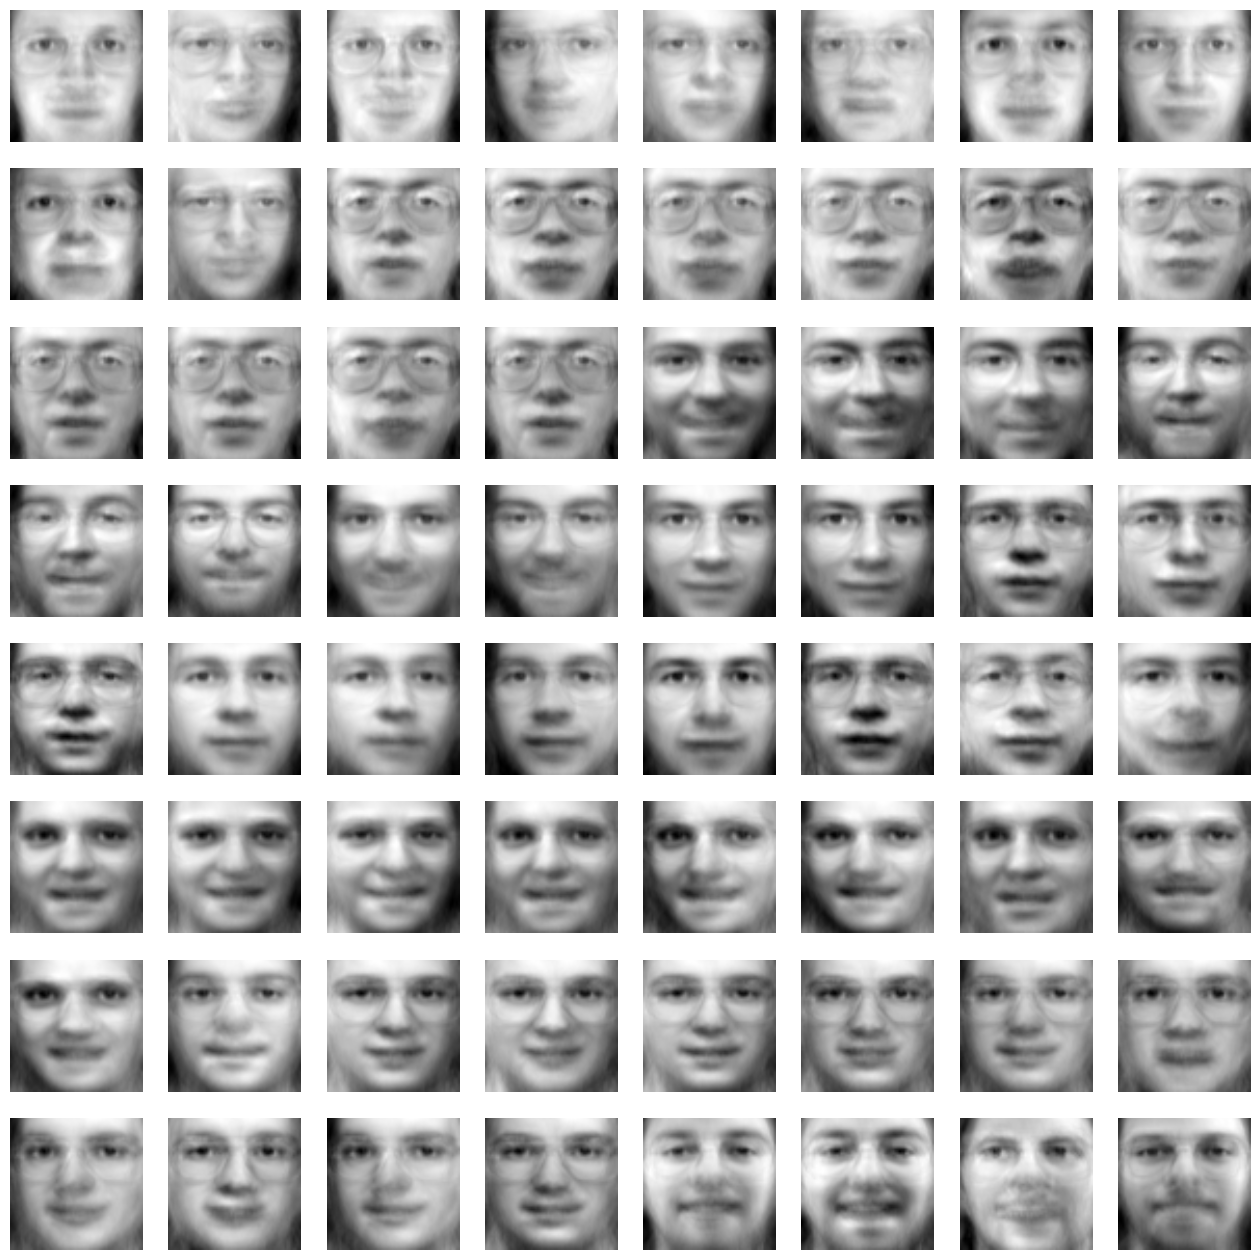

In [50]:
# Reconstructed faces
Arec = pca.inverse_transform(pca.transform(A0))

# Sample of reconstructed faces
fig = plt.figure(figsize=(16, 16))
for i in range(64):
    plt.subplot(8, 8, i + 1) # It starts with one
    plt.imshow(Arec[i].reshape(64,64), cmap=plt.cm.gray)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

In [51]:
np.sum(pca.explained_variance_ratio_)

0.73100567

### Notes
* The matrix $A$ was taken from Prof. Gilbert Strang's textbook (see link below) from page 383. (I transposed his matrix, however, to make observations rows and columns features!)
* Professor Andrew Ng's course on Machine Learning is highly recommended.
* According to Prof. Ng, mean normilization (i.e. every feature has zero mean) is required, while feature scaling is optional (e.g. perhaps your data is already in the same units and roughly same variability thus no need to scale.)
* Prof. Strang divides his covariance matrix by $m-1$ (he calls this a "sample covariance matrix") while Andrew Ng divides by $m$. From Prof. Strang, "We divide by $m-1$ instead of $m$ for reasons best known to statisticians."
* **sklearn.decomposition.PCA** applies mean normalization automatically. No need to subtract mean beforehand.
* The [Eigenface blog post](https://bugra.github.io/work/notes/2014-11-16/an-introduction-to-unsupervised-learning-scikit-learn/) uses `sklearn.decomposition.RandomizedPCA` with `whiten=True`.

### Links
* [Professor Strang's textbook on Linear Algebra](http://math.mit.edu/~gs/linearalgebra/)
* [Prof. Strang's Linear Algebra Course - MIT 18.06](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/)
* [Andrew Ng's Machine Learning Course](https://www.coursera.org/learn/machine-learning/)
* [Wicked animated GIF which illustrates PCA](http://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)
* [Eating in the UK (a 17D example)](http://setosa.io/ev/principal-component-analysis/)
* [API for scikit-learn's PCA module](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* [Eigenface blog post](https://bugra.github.io/work/notes/2014-11-16/an-introduction-to-unsupervised-learning-scikit-learn/)
* [Wikipedia article on PCA](https://en.m.wikipedia.org/wiki/Principal_component_analysis)
* [Google research paper](https://arxiv.org/pdf/1404.1100.pdf)

### Appendix

Some sources, like [Google research paper](https://arxiv.org/pdf/1404.1100.pdf), have rows as features and columns as observations. Why?! Prof. Strang does this as well. Thus, $\Sigma = A A^T/{(m-1)}$ where $m$ is the number of columns. Consequently, the reduced version of the dataset is found by computing $X_k^T A$. For example, from Google's Matlab code on solving PCA using eigenvector demposition:
```
% project the original data set
signals = PC’ * data;
```
Let's verify that we get the same answer either way.

In [52]:
# Original way: rows as observations and features as columns
A = np.array([[3,7],[-4,-6],[7,8],[1,-1],[-4,-1],[-3,-7]])
A = np.asmatrix(A) # to ensure no hiccups from nd.array
m,n = A.shape
Sigma = (A.T @ A)/(m-1)
l, X = np.linalg.eig(Sigma)
print("Compressed - Rows as observations")
print(A @ X[:,1]) # compressed version

# Rows as features and observations as columns
A = A.T
n,m = A.shape
Sigma = (A @ A.T)/(m-1) # note difference
l, X = np.linalg.eig(Sigma)
print("Compressed - Rows as features")
print(X[:,1].T @ A) # compressed version

Compressed - Rows as observations
[[ -7.47835704]
 [  7.21091862]
 [-10.54893951]
 [  0.26743842]
 [  3.07058247]
 [  7.47835704]]
Compressed - Rows as features
[[ -7.47835704   7.21091862 -10.54893951   0.26743842   3.07058247
    7.47835704]]
